### Modelos de Clasificación

1. **Entendimiento del negocio**  
2. **Entendimiento de los datos**  
3. **Preparación de los datos**  
4. **Modelado**  
5. **Evaluación**  
6. **Despliegue (conclusiones)**   

### 1. ENTENDIMIENTO DEL NEGOCIO:
Estamos trabajando para un hospital el cual necesita un modelo de lcasificación para determinar si un paciente es diabetico, prediabetico o no

**Enfoque Análitico**  
Este modelo debe tener una prescición minima del 85% y encontrar la mejor matriz de confusión y f1 score   

**Requerimiento de los datos**  
- Health data
- Habits data 
- Personal data 
- Diabetes, PreDiabetes, NoDiabetes




![Texto alternativo](img/foto2.jpg)
![Texto alternativo](img/foto1.jpg)



In [3]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sb
warnings.filterwarnings('ignore')

data = pd.read_csv('datos_caso_1.csv')

### 2. Entendimiento de los datos   
- Datos nulos
- Estadísticas univariada, bivariada y multivariada
- Desbalance de y

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

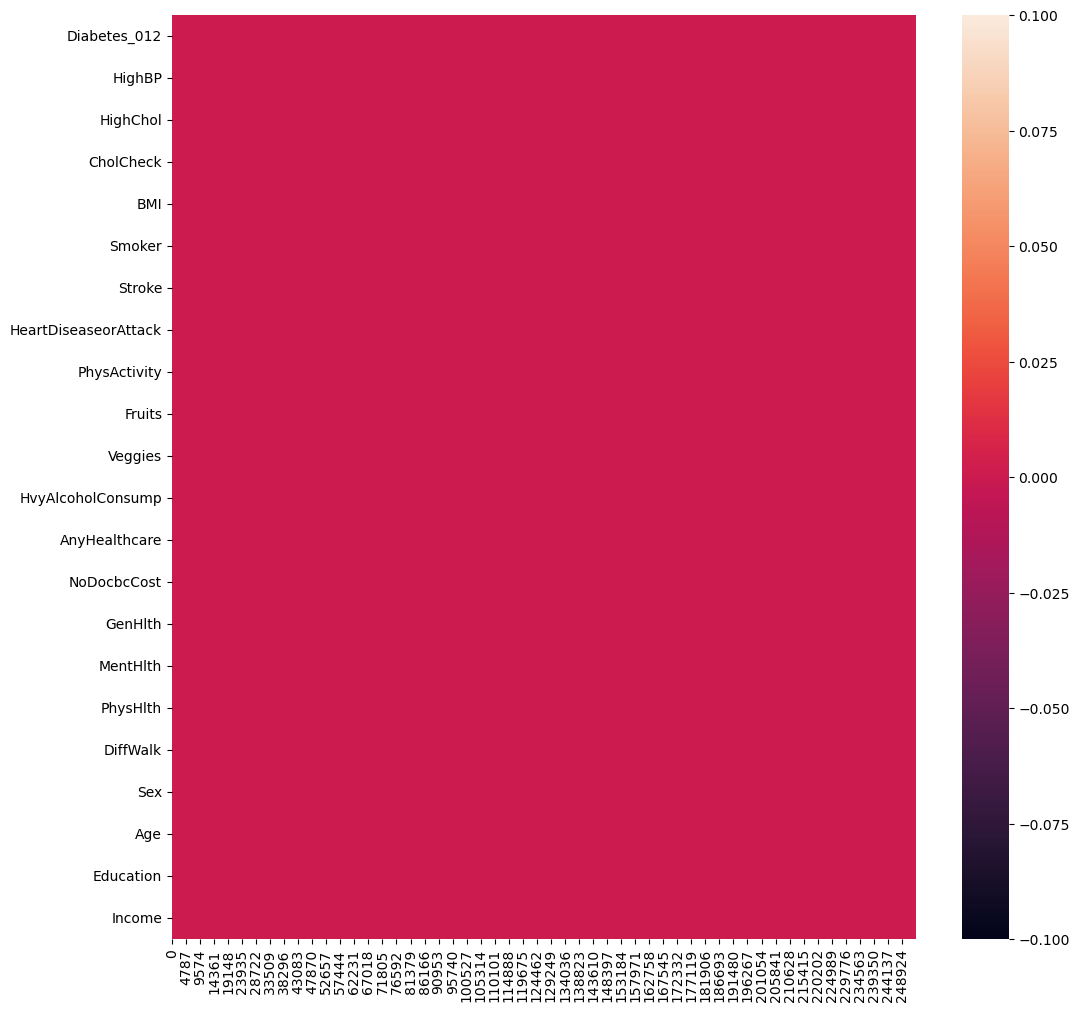

In [5]:
plt.figure(figsize=(12,12))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data = df))
plt.show()

In [8]:
nulos = data.isnull().sum()
print(nulos[nulos > 0])

Series([], dtype: int64)


No tenemos datos nulos en nuestro data set entonces no tenemos que imputar  
#### Exploración Univariada de datos 

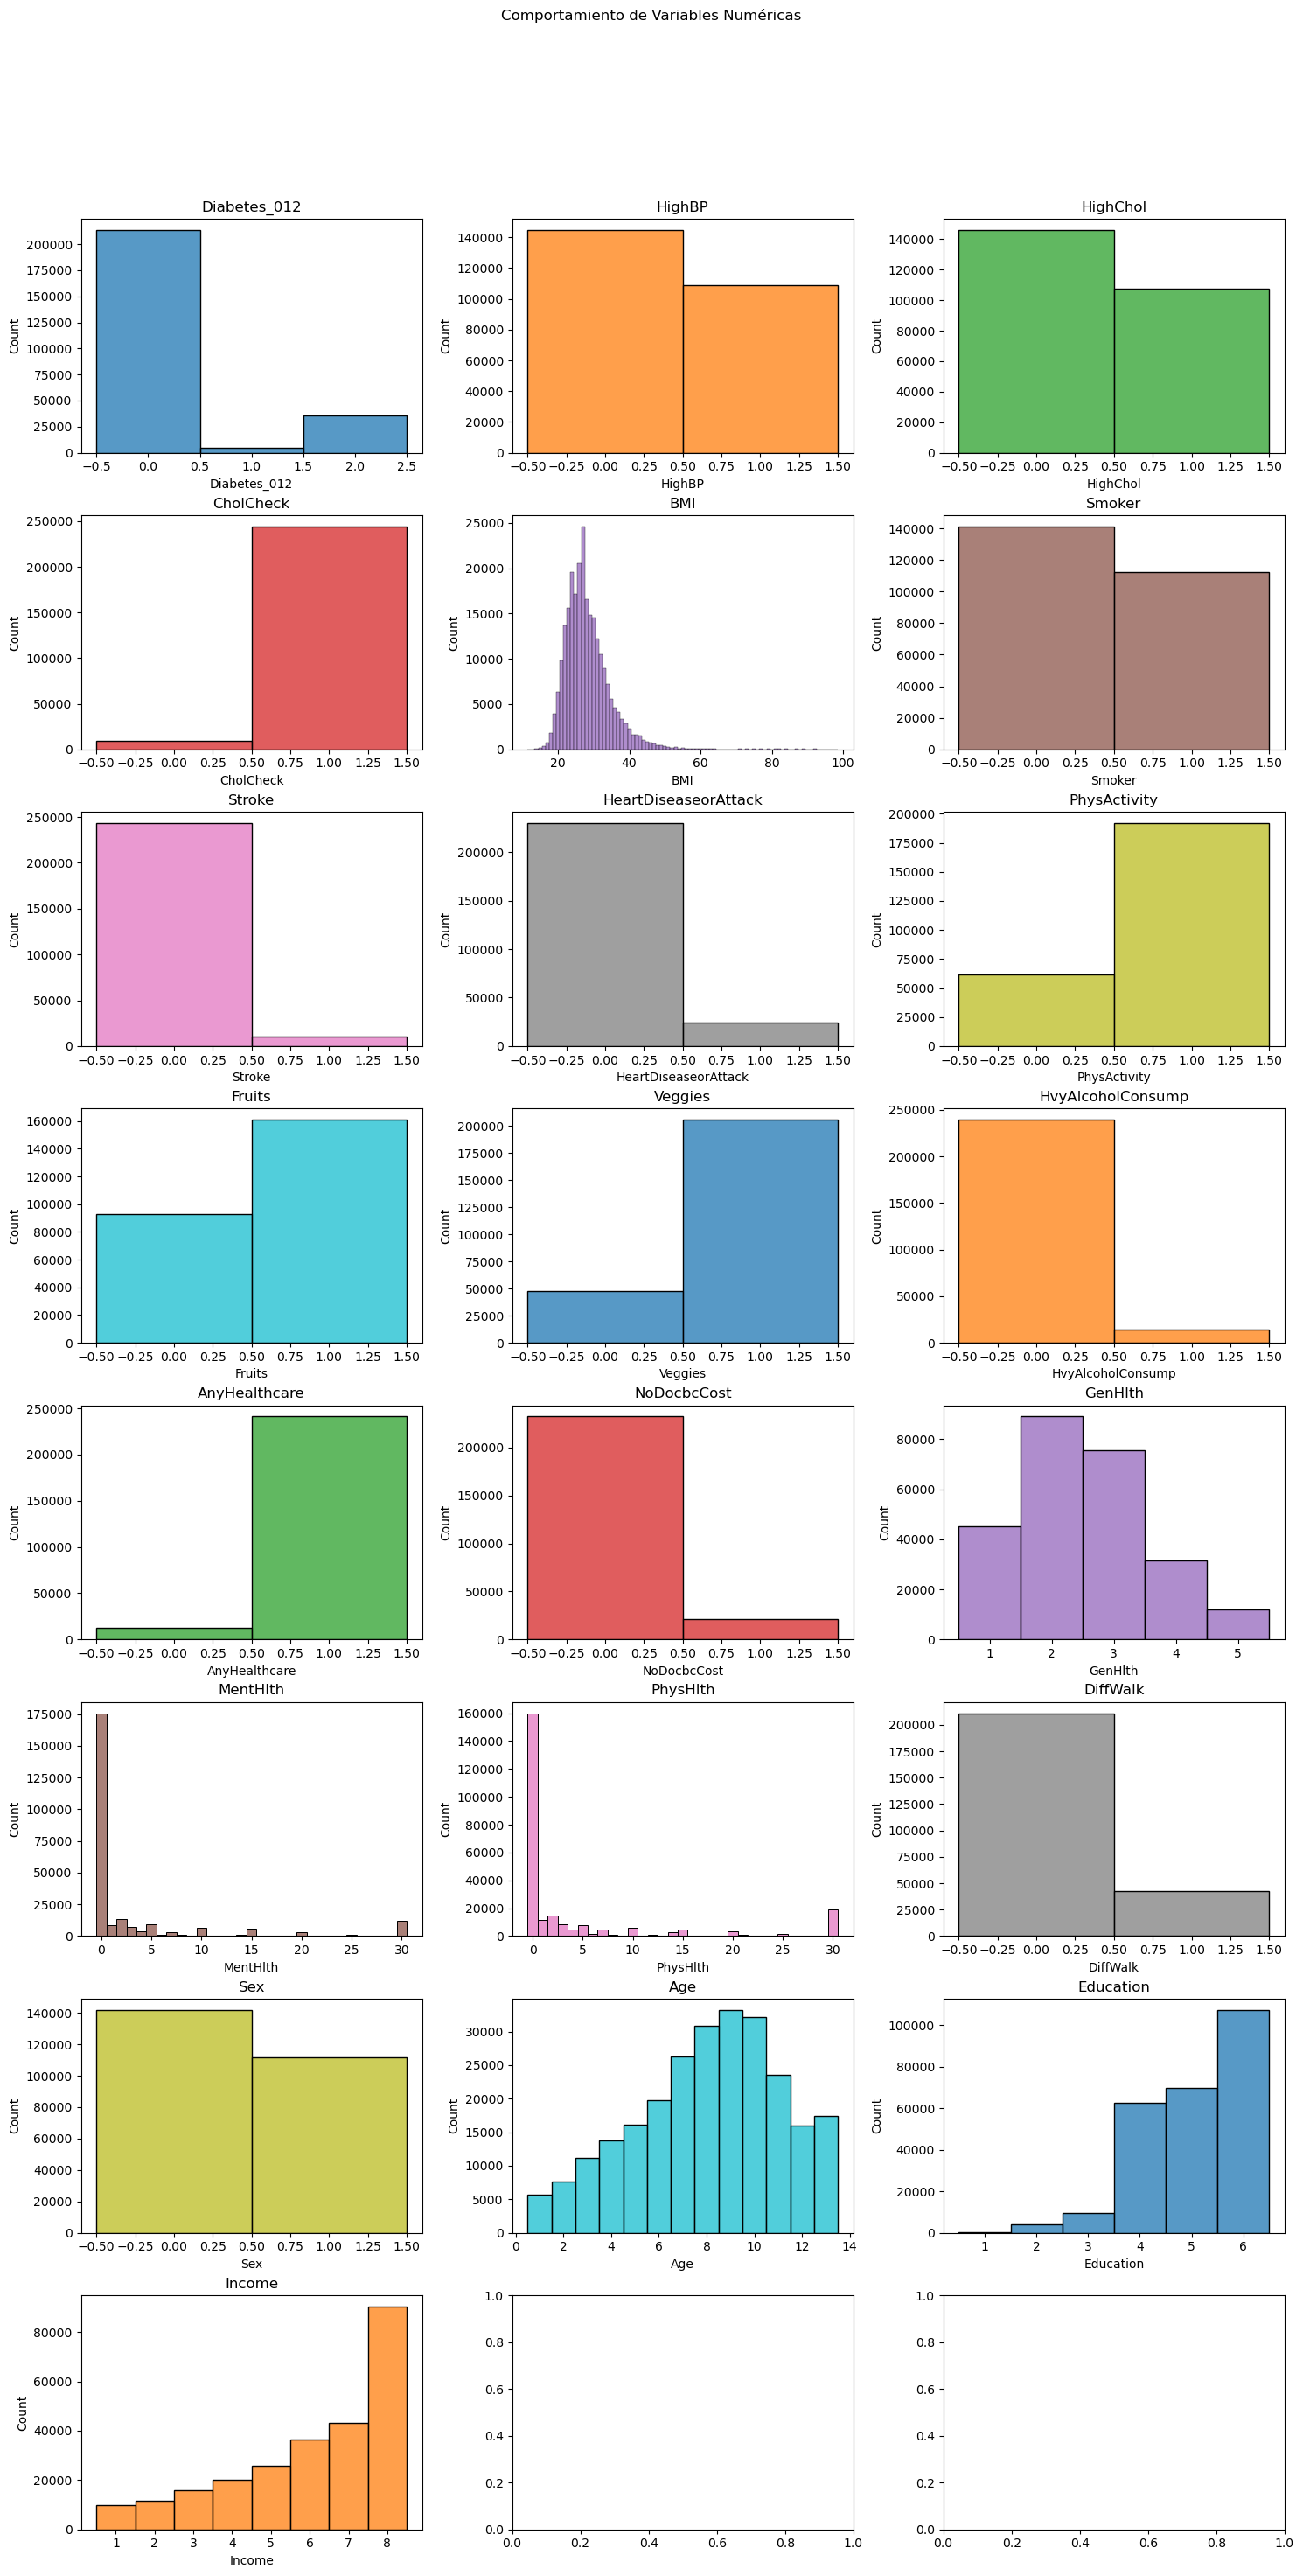

In [ ]:
fig, ax = plt.subplots(8, 3, figsize = (15, 30))
ax = ax.flat
num_col = data.select_dtypes(include = ['float64']).columns 
for i, col in enumerate(num_col):
    sb.histplot(data = data, 
                x = col, 
                discrete=True,   # Para datos enteros pequeños
                kde = False,
                color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()

Las variables se comportan todas de manera consecuente a lo que nos dice el diccionario

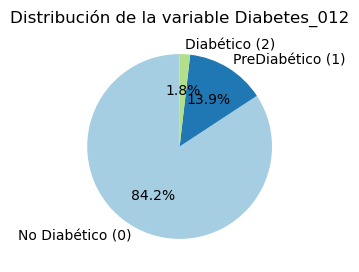

In [6]:
# grafico para ver desbalanceo de y (diabetes_012)
plt.figure(figsize=(3, 3))
data['Diabetes_012'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    labels=['No Diabético (0)', 'PreDiabético (1)', 'Diabético (2)']
)
plt.title('Distribución de la variable Diabetes_012')
plt.ylabel('')
plt.show()

Podemos ver que Y está desbalanceada, 0 (No diabetes) equivale a más del 80%

### 3. Preparación de los datos 
- Balanceo de variable y, inicialmente haremos el balanceo con replicación aleatoria 

In [7]:

data_Diabetico= data[data['Diabetes_012'] == 2]
data_PreDiabetico = data[data['Diabetes_012'] == 1]
data_NoDiabetico = data[data['Diabetes_012'] == 0]

print(f"High: {data_Diabetico.shape}, Medium: {data_PreDiabetico.shape}, Low: {data_NoDiabetico.shape}")

High: (35346, 22), Medium: (4631, 22), Low: (213703, 22)


In [8]:
# oversampling para balancear la variable 
data_Diabetico_over = data_Diabetico.sample(data_NoDiabetico.shape[0], replace=True)
data_PreDiabetico_over = data_PreDiabetico.sample(data_NoDiabetico.shape[0], replace=True)

data_balanced = pd.concat([data_Diabetico_over, data_PreDiabetico_over, data_NoDiabetico])
data_balanced.reset_index(drop = True, inplace = True)
data_balanced.info()
print(f"High: {data_Diabetico_over.shape}, Medium: {data_PreDiabetico_over.shape}, Low: {data_NoDiabetico.shape[0]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641109 entries, 0 to 641108
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          641109 non-null  float64
 1   HighBP                641109 non-null  float64
 2   HighChol              641109 non-null  float64
 3   CholCheck             641109 non-null  float64
 4   BMI                   641109 non-null  float64
 5   Smoker                641109 non-null  float64
 6   Stroke                641109 non-null  float64
 7   HeartDiseaseorAttack  641109 non-null  float64
 8   PhysActivity          641109 non-null  float64
 9   Fruits                641109 non-null  float64
 10  Veggies               641109 non-null  float64
 11  HvyAlcoholConsump     641109 non-null  float64
 12  AnyHealthcare         641109 non-null  float64
 13  NoDocbcCost           641109 non-null  float64
 14  GenHlth               641109 non-null  float64
 15  

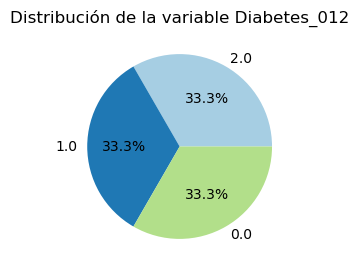

In [9]:
plt.figure(figsize=(3, 3))
data_balanced['Diabetes_012'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=plt.cm.Paired.colors,
    labels=data_balanced['Diabetes_012'].value_counts().index
)
plt.title('Distribución de la variable Diabetes_012')
plt.ylabel('')
plt.show()

Separaremos la X y la Y para poder hacer la codificación y separar la población de entreno y de testeo 

In [10]:
x = data_balanced.drop(columns = ['Diabetes_012'])
y = data_balanced[['Diabetes_012']]

print(f'el tamaño de X es: {x.shape}, el tamaño de y es: {y.shape}')

el tamaño de X es: (641109, 21), el tamaño de y es: (641109, 1)


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_col = x.select_dtypes(include = ['float64']).columns.to_list()

numTransformer  = Pipeline(steps=[('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(transformers=[
    ('num', numTransformer, num_col)
])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['HighBP', 'HighChol', 'CholCheck', 'BMI',
                                  'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                                  'PhysActivity', 'Fruits', 'Veggies',
                                  'HvyAlcoholConsump', 'AnyHealthcare',
                                  'NoDocbcCost', 'GenHlth', 'MentHlth',
                                  'PhysHlth', 'DiffWalk', 'Sex', 'Age',
                                  'Education', 'Income'])])

In [12]:
x_pre = preprocessor.fit_transform(x)
x_pro  = pd.DataFrame(x_pre, columns = num_col)
x_pro.head()
x_pro.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641109 entries, 0 to 641108
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                641109 non-null  float64
 1   HighChol              641109 non-null  float64
 2   CholCheck             641109 non-null  float64
 3   BMI                   641109 non-null  float64
 4   Smoker                641109 non-null  float64
 5   Stroke                641109 non-null  float64
 6   HeartDiseaseorAttack  641109 non-null  float64
 7   PhysActivity          641109 non-null  float64
 8   Fruits                641109 non-null  float64
 9   Veggies               641109 non-null  float64
 10  HvyAlcoholConsump     641109 non-null  float64
 11  AnyHealthcare         641109 non-null  float64
 12  NoDocbcCost           641109 non-null  float64
 13  GenHlth               641109 non-null  float64
 14  MentHlth              641109 non-null  float64
 15  

Separación del modelo para el entrenamiento, ya que esto es un caso clinico, se debe hacer una partición ácida, 90/10

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_pro, y, test_size=0.1, random_state=123)

print(f'el tamaño de X_train es: {X_train.shape}, el tamaño de X_test es: {X_test.shape}')
print(f'el tamaño de y_train es: {Y_train.shape}, el tamaño de y_test es: {Y_test.shape}')

el tamaño de X_train es: (576998, 21), el tamaño de X_test es: (64111, 21)
el tamaño de y_train es: (576998, 1), el tamaño de y_test es: (64111, 1)


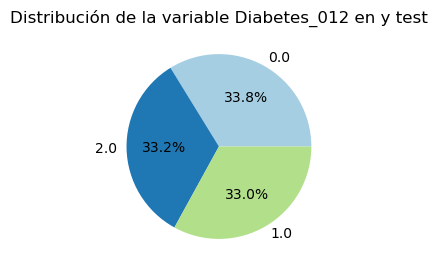

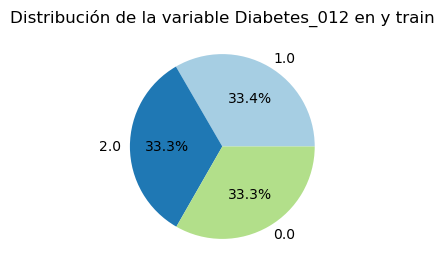

In [14]:
plt.figure(figsize=(3, 3))
Y_test['Diabetes_012'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=plt.cm.Paired.colors,
    labels=Y_test['Diabetes_012'].value_counts().index
)
plt.title('Distribución de la variable Diabetes_012 en y test')
plt.ylabel('')
plt.show()

plt.figure(figsize=(3, 3))
Y_train['Diabetes_012'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=plt.cm.Paired.colors,
    labels=Y_train['Diabetes_012'].value_counts().index
)
plt.title('Distribución de la variable Diabetes_012 en y train')
plt.ylabel('')
plt.show()

Vemos que en la separación ambas variables y quedaron balanceadas, ya podemos seguir con el entrenamiento 

### 4. Construcción del modelo 
#### 4.1 LogisticRegression

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # metodos de busqueda de hiperparametros con validacion cruzada



In [15]:
from sklearn.linear_model import LogisticRegression

# dejaremos saga como el metodo para encotnrar la gradiente ya que nos deja

model1 = LogisticRegression(solver = 'saga', random_state=123)
#si el mejor da en los limites debemos ampliar el rango, si están dos muy iguales investigamos ese rango
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]} 

clf_1 = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5, scoring='accuracy') #cv: debe ser impar entero, f1 tiene en cuenta el acuracy y recall
clf_1.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=123, solver='saga'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                               1000.0],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [17]:
validacion = pd.concat([pd.DataFrame(clf_1.cv_results_['params']),
                        pd.DataFrame(clf_1.cv_results_['mean_test_score'], columns=['accuracy'])], axis=1)
validacion.sort_values(by='accuracy', ascending=False)

,C,penalty,accuracy
16,10.0000,l2,0.521690
19,100.0000,l2,0.521690
22,1000.0000,l2,0.521686
13,1.0000,l2,0.521679
18,100.0000,l1,0.521676
15,10.0000,l1,0.521671
21,1000.0000,l1,0.521669
12,1.0000,l1,0.521666
10,0.1000,l2,0.521641
6,0.0100,l1,0.521593


In [18]:
modelo_1_final= clf_1.best_estimator_
modelo_1_final

LogisticRegression(C=10.0, random_state=123, solver='saga')

              precision    recall  f1-score   support

         0.0       0.60      0.66      0.63    192041
         1.0       0.43      0.32      0.37    192545
         2.0       0.51      0.59      0.54    192412

    accuracy                           0.52    576998
   macro avg       0.51      0.52      0.51    576998
weighted avg       0.51      0.52      0.51    576998

[[127170  32904  31967]
 [ 53235  60791  78519]
 [ 32874  46419 113119]]


<Axes: >

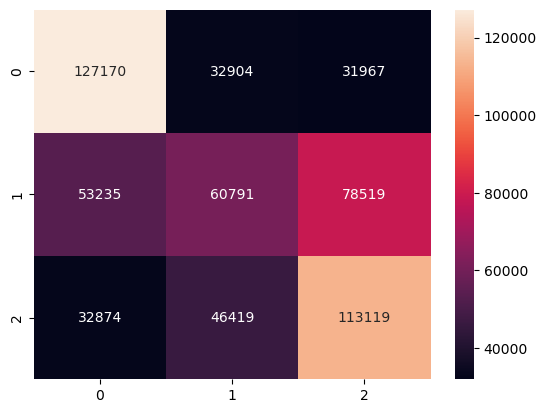

In [19]:
y_pred_1_train = modelo_1_final.predict(X_train)


print(classification_report(Y_train, y_pred_1_train))
print(confusion_matrix(Y_train, y_pred_1_train))
sb.heatmap(confusion_matrix(Y_train, y_pred_1_train), annot=True, fmt='d')

              precision    recall  f1-score   support

         0.0       0.60      0.66      0.63     21662
         1.0       0.43      0.31      0.36     21158
         2.0       0.50      0.59      0.54     21291

    accuracy                           0.52     64111
   macro avg       0.51      0.52      0.51     64111
weighted avg       0.51      0.52      0.51     64111

[[14333  3608  3721]
 [ 5790  6537  8831]
 [ 3665  5130 12496]]


<Axes: >

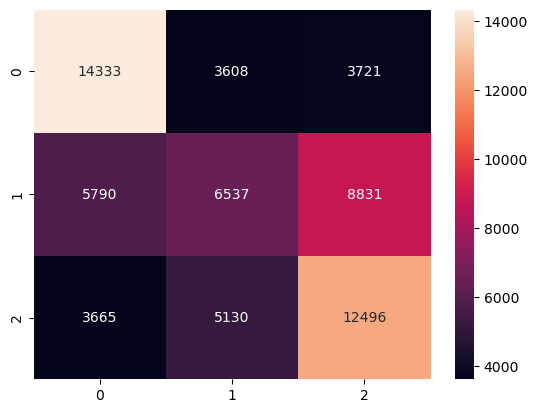

In [20]:
y_pred_1_test = modelo_1_final.predict(X_test)

print(classification_report(Y_test, y_pred_1_test))
print(confusion_matrix(Y_test, y_pred_1_test))
sb.heatmap(confusion_matrix(Y_test, y_pred_1_test), annot=True, fmt='d')

# columnas prediccion, filas real 

#### 4.2 K-Vecinos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modelo_2 = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 19, 21, 53], 'p': [1, 2]} # 1 es manhattan y 2 es euclidiana
clf_2 = GridSearchCV(modelo_2, param_grid, cv=5, scoring='f1_weighted')
clf_2.fit(X_train, Y_train)


In [ ]:
validacion = pd.concat([pd.DataFrame(clf_2.cv_results_['params']),
                        pd.DataFrame(clf_2.cv_results_['mean_test_score'], columns=['f1_weighted'])], axis=1)
validacion.sort_values(by='f1_weighted', ascending=False)

In [ ]:
modelo_2_final = clf_2.best_estimator_
modelo_2_final

In [ ]:
y_pred_2_train = modelo_2_final.predict(X_train)

print(classification_report(Y_train, y_pred_2_train))
print(confusion_matrix(Y_train, y_pred_2_train))
sb.heatmap(confusion_matrix(Y_train, y_pred_2_train), annot=True, fmt='d')


In [ ]:
y_pred_2_test = modelo_2_final.predict(X_test)

print(classification_report(Y_test, y_pred_2_test))
print(confusion_matrix(Y_test, y_pred_2_test))
sb.heatmap(confusion_matrix(Y_test, y_pred_2_test), annot=True, fmt='d')

#### 4.3 Maquina de soporte vectorial

#### 4.4 tree


In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

modelo_4 = DecisionTreeClassifier(random_state=123)

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 3, 4], # 
              'max_leaf_nodes': [None, 10, 20, 50]}

clf_4 = GridSearchCV(estimator=modelo_4, param_grid=param_grid, cv=3, scoring='f1_weighted') # cv tiene que ver con la complegidad 
clf_4.fit(X_train, Y_train) 

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 20],
                         'max_leaf_nodes': [None, 10, 20, 50],
                         'min_samples_split': [2, 3, 4]},
             scoring='f1_weighted')

In [22]:
validation = pd.concat([pd.DataFrame(clf_4.cv_results_['params']),
                        pd.DataFrame(clf_4.cv_results_['mean_test_score'], columns=['f1_weighted'])], axis=1)
validation.sort_values(by='f1_weighted', ascending=False)

,criterion,max_depth,max_leaf_nodes,min_samples_split,f1_weighted
48,entropy,NaN,NaN,2,0.925916
96,log_loss,NaN,NaN,2,0.925916
0,gini,NaN,NaN,2,0.925852
49,entropy,NaN,NaN,3,0.921766
97,log_loss,NaN,NaN,3,0.921766
...,...,...,...,...,...
89,entropy,20.0,10.0,4,0.467397
99,log_loss,NaN,10.0,2,0.467397
101,log_loss,NaN,10.0,4,0.467397
111,log_loss,5.0,10.0,2,0.467397


In [23]:
modelo_4_final = clf_4.best_estimator_
modelo_4_final

DecisionTreeClassifier(criterion='entropy', random_state=123)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    192041
         1.0       0.99      1.00      1.00    192545
         2.0       0.99      0.99      0.99    192412

    accuracy                           0.99    576998
   macro avg       0.99      0.99      0.99    576998
weighted avg       0.99      0.99      0.99    576998

[[189466    731   1844]
 [     0 192545      0]
 [   570    506 191336]]


<Axes: >

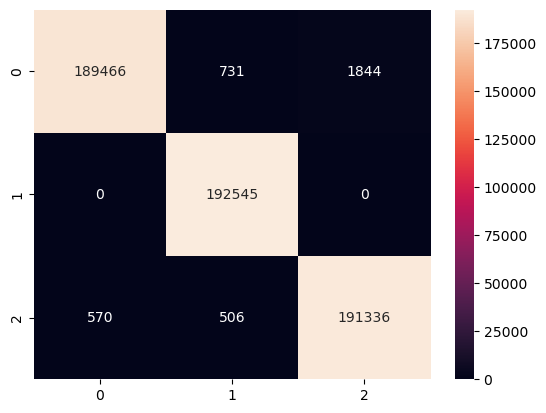

In [24]:
y_pred_4_train = modelo_4_final.predict(X_train)

print(classification_report(Y_train, y_pred_4_train))
print(confusion_matrix(Y_train, y_pred_4_train))
sb.heatmap(confusion_matrix(Y_train, y_pred_4_train), annot=True, fmt='d')

              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91     21662
         1.0       0.97      1.00      0.99     21158
         2.0       0.88      0.99      0.93     21291

    accuracy                           0.94     64111
   macro avg       0.95      0.95      0.94     64111
weighted avg       0.95      0.94      0.94     64111

[[18316   528  2818]
 [    0 21158     0]
 [  164    56 21071]]


<Axes: >

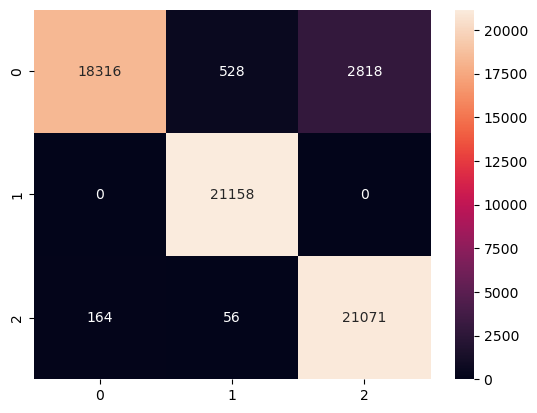

In [25]:
y_pred_4_test = modelo_4_final.predict(X_test)

print(classification_report(Y_test, y_pred_4_test))
print(confusion_matrix(Y_test, y_pred_4_test))
sb.heatmap(confusion_matrix(Y_test, y_pred_4_test), annot=True, fmt='d')

#### 4.5 

### 5. Evaluación del modelo 